## Programming Exercise 1

### Setup
This loads the required modules. No other modules are necessary to successfully finish this exercise.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, color, img_as_float,util

### 1.1 Digital Images

#### 1.1.1
Load the image *shapes.png* from the *resources* folder using `io.imread` ([docs](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread)) and display it using `plt.imshow` ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)).

<class 'numpy.ndarray'>


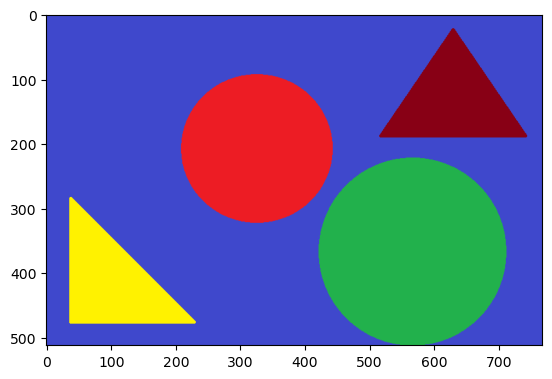

In [5]:
input_image=io.imread("D:/WINTER SEMESTER SUBJECTS/ivmsp/Exercises/EX-1/exercise-01-programming/resources/shapes.png")
print(type(input_image))
plt.imshow(input_image)

#### 1.1.2
Write a function `print_resolution` that takes an image as input and prints its resolution as `<width>x<height>`.

*Hint: `io.imread` returns the image as a numpy array.*

In [6]:
def print_resolution(img):
    width,height=img.shape[1] , img.shape[0]
    return f"Resolution={width} X {height}"
print_resolution(input_image)

'Resolution=768 X 512'

#### 1.1.3
The original image is stored using an 8 bit unsigned integer format (*uint8*). In digital image signal processing, images are often processed in a floating point format where values are normalized to the range 0.0 to 1.0. This allows to process images independently of their storage bitdepth (8 bit, 10 bit, 16 bit, etc.).  
Write a function `uint8_to_float` that converts a given 8 bit unsigned image to floating point format and normalizes its values to the range 0.0 to 1.0.

In [7]:
def uint8_to_float(image):
    image=image/255
    return image
input_image_float=uint8_to_float(input_image)


#### 1.1.4
The image is in RGB color format and hence has three color channels representing the red, green and blue pixel intensities. Extract the individual color channels from the image. Display each color channel individually. What do you observe?

*Hint: The  `.shape` property of the image might give you an idea where to find the color channels.*  
*Hint: Use `cmap=gray` for the `imshow` function to disable the automatic colorization of matplotlib.*

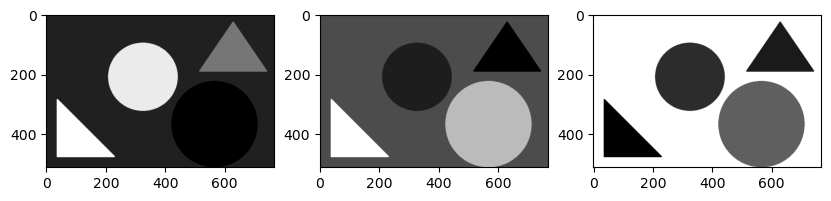

In [8]:
R_channel=input_image_float[:,:,0]
G_channel=input_image_float[:,:,1]
B_channel=input_image_float[:,:,2]
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.imshow(R_channel,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(G_channel,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(B_channel,cmap='gray')
plt.show()


#### 1.1.5
Many image signal processing algorithms only take the overall light intensity into account and do not require color data. Use the `color.rgb2gray` ([docs](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray)) function to convert the image to grayscale format and display the obtained grayscale image.

*Information:* `color.rgb2gray` *calculates the value of each grayscale pixel as the weighted sum of the corresponding red, green and blue pixels as:*
```
Y = 0.2125 R + 0.7154 G + 0.0721 B
```
*These weights are used by CRT phosphors as they better represent human perception of red, green and blue than equal weights. (Source: [scikit-image docs](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html))* 

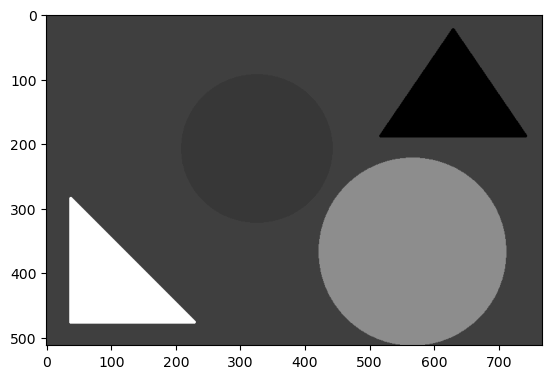

In [9]:
image_gray=color.rgb2gray(input_image_float)
plt.imshow(image_gray,cmap='gray')
plt.show()

### 1.2 Histogram Equalization

#### 1.2.1
Load the images *shed_2.png* and *shed_3.png* from the resources folder, convert them to floating point format and transform their color space to grayscale. Display the loaded grayscale images.

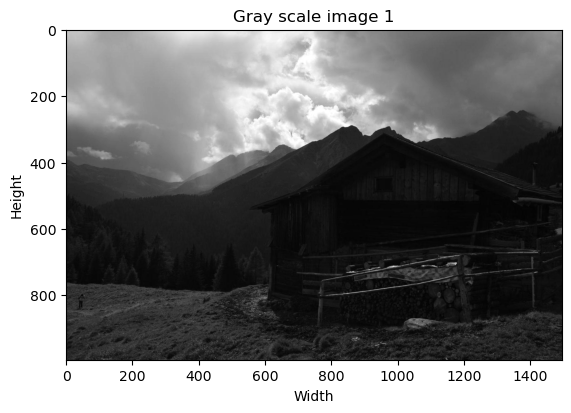

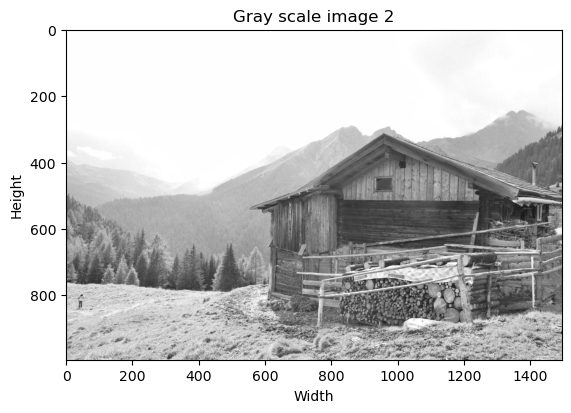

In [10]:
image_1=io.imread("D:/WINTER SEMESTER SUBJECTS/ivmsp/Exercises/EX-1/exercise-01-programming/resources/shed_2.png")
image_2=io.imread("D:/WINTER SEMESTER SUBJECTS/ivmsp/Exercises/EX-1/exercise-01-programming/resources/shed_3.png")
image_1_float=uint8_to_float(image_1)
image_2_float=uint8_to_float(image_2)
image_1_gray=color.rgb2gray(image_1_float)
#image_1_float_gray=color.rgb2gray(image_1_float)
image_2_gray=color.rgb2gray(image_2_float)
plt.imshow(image_1_gray,cmap='gray')
plt.title("Gray scale image 1")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()
plt.imshow(image_2_gray,cmap='gray')
plt.title("Gray scale image 2")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

#### 1.2.2
Plot the histograms of the grayscale images and compare them.

*Hint: Matplotlib's `hist` function might be useful ([documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html)).*

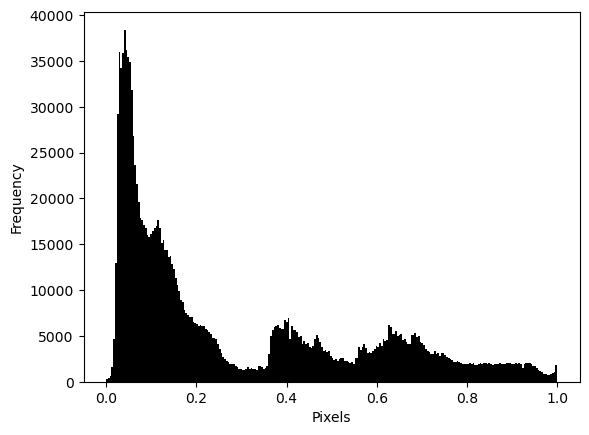

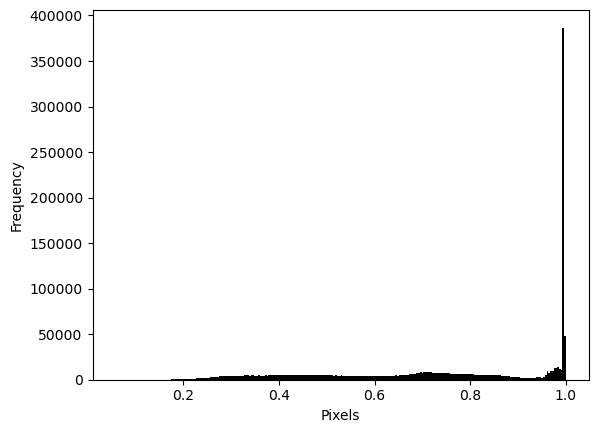

In [11]:
plt.hist(image_1_gray.ravel(),bins=256,color='black')
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()
plt.hist(image_2_gray.ravel(),bins=256,histtype='bar',color='black')
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()


#### 1.2.3
Write a function `histogram_equalize` and implement a global histogram equalization.
* Input: Grayscale image in floating point format
* Output: Histogram equalized image in floating point format

Use the implemented function to perform a histogram equalization on the grayscale images *shed_2* and *shed_3*, and display the results.

(257,)
(256,)
(257,)
(256,)


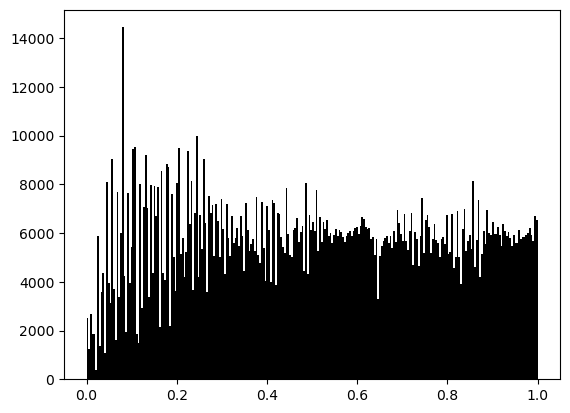

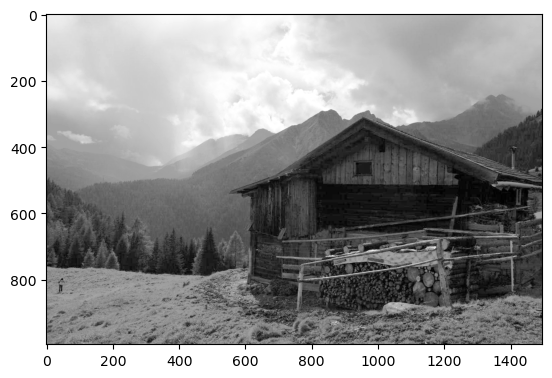

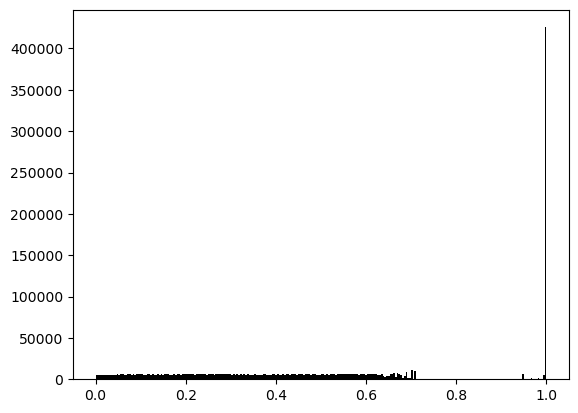

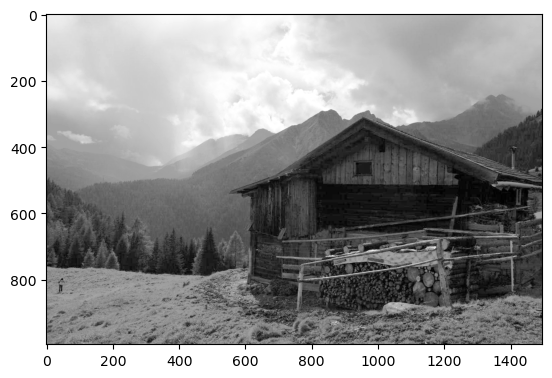

In [19]:
def histogram_equalize(image_gray,L=256):
    hist, bins = np.histogram(image_gray.flatten(),bins=256,range=[0,1])
    cdf = hist.cumsum()
    print(bins.shape)
    print(bins[:-1].shape)
    cdf_normalized = cdf/cdf[-1]
    equalized_image = np.interp(image_gray.flatten(), bins[:-1], cdf_normalized)
    equalized_image = (L - 1) * equalized_image
    equalized_image=equalized_image.reshape(image_gray.shape)
    equalized_image=equalized_image/255
    return equalized_image,cdf_normalized
image_1_equalized,cdf_normalized_1=histogram_equalize(image_1_gray)
image_2_equalized,cdf_normalized_2=histogram_equalize(image_2_gray)
plt.hist(image_1_equalized.ravel(),bins=256, histtype='bar', color='black')
plt.show()
plt.imshow(image_1_equalized,cmap='gray')
plt.show()
plt.hist(image_2_equalized.ravel(),bins=256, histtype='bar', color='black')
plt.show()
plt.imshow(image_1_equalized,cmap='gray')
plt.show()

#### 1.2.4
While the global histogram equalization already delivers decent results for the image *shed_2*, this is not the case for the image *shed_3*, where the contrast in the sky is unnaturally high and leads to disturbing edges. The **contrast-limited adaptive histogram equalization (CLAHE)** might alleviate this problem.  
Use the `exposure.equalize_adapthist` ([documentation](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_adapthist)) function to perform a contrast-limited adaptive histogram equalization on the images and display the results.  
How do the clipping threshold and the kernel size affect the result?  
How do you need to set the clipping threshold to obtain a pure (non-contrast-limited) **adaptive histogram equalization**?

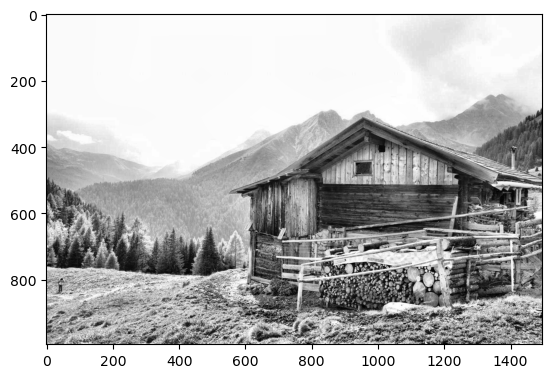

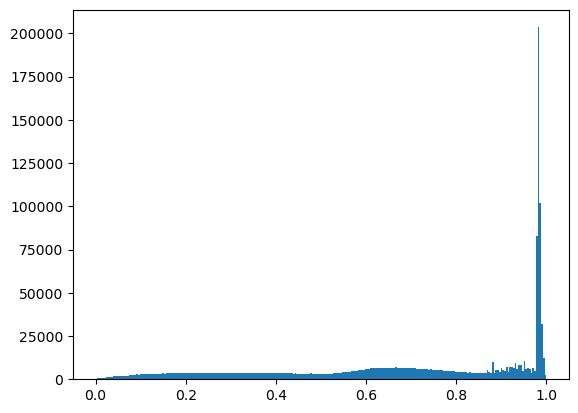

In [14]:
clahe_2=exposure.equalize_adapthist(image_2_gray)
plt.imshow(clahe_2,cmap='gray')
plt.show()
plt.hist(clahe_2.ravel(),bins=256,range=[0,1])
plt.show()